<a href="https://colab.research.google.com/github/mdmahboob63/AIML_Assignment_Mahboob/blob/main/Assignment_of_Probabilistic_ML_models_0126.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Network

#*Exercise*
1. Try padding in convolution on lotus.jpg and show results


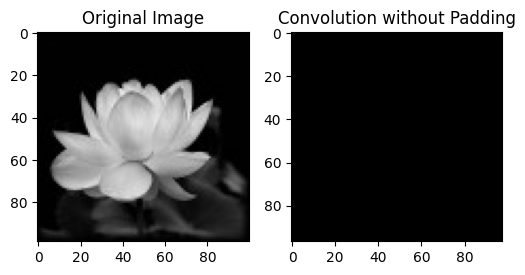

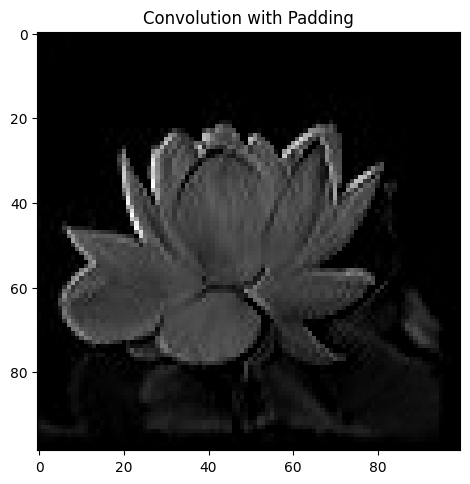

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the image
image_path = "lotus.jpg"  # Replace with the actual path to your image
image = tf.keras.preprocessing.image.load_img(image_path)
image_array = tf.keras.preprocessing.image.img_to_array(image)

# Add batch dimension and normalize the image
input_image = tf.expand_dims(image_array, axis=0) / 255.0

# Display the original image
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

# Apply convolution without padding
conv_without_padding = tf.keras.layers.Conv2D(1, (3, 3), activation='relu')(input_image)
plt.subplot(1, 2, 2)
plt.imshow(conv_without_padding[0, :, :, 0], cmap='gray')
plt.title("Convolution without Padding")

# Apply convolution with padding
conv_with_padding = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='relu')(input_image)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(conv_with_padding[0, :, :, 0], cmap='gray')
plt.title("Convolution with Padding")

plt.show()


###*2. Try stride  in convolution on lotus.jpg and show results*

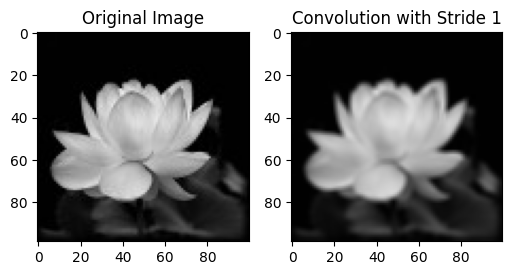

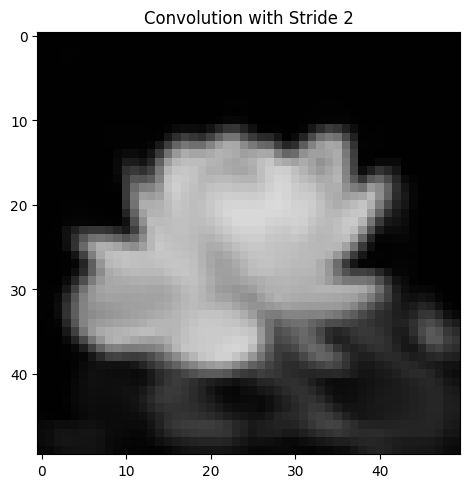

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "lotus.jpg"  # Replace with the actual path to your image

# Check if the image file exists
try:
    image = cv2.imread(image_path)

    if image is None:
        raise FileNotFoundError(f"Error: Unable to load the image from the path '{image_path}'.")

except Exception as e:
    print(f"Error: {e}")
    exit()

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, 0)

# Display the original image
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, 0))
plt.title("Original Image")

# Apply convolution with stride 1
kernel = np.ones((3, 3), np.float32) / 9
conv_stride_1 = cv2.filter2D(gray_image, -1, kernel)
plt.subplot(1, 2, 2)
plt.imshow(conv_stride_1, cmap='gray')
plt.title("Convolution with Stride 1")

# Apply convolution with stride 2 manually
stride = 2
conv_stride_2 = cv2.filter2D(gray_image[::stride, ::stride], -1, kernel)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(conv_stride_2, cmap='gray')
plt.title("Convolution with Stride 2")

plt.show()


#Excercise

Q 1: What is the ratio of parameters in single 5 x 5 kernel and equivalent stacked 3 x 3 kernels? Consider number of channels in input and output channels as C.

Answer:  the number of parameters in a single 5x5 kernel and equivalent stacked 3x3 kernels. Assuming the input has C input channels and the output has C output channels, we can calculate the number of parameters in each case.

#Single 5x5 Kernel:

For each output channel, we have a 5x5 kernel.
So, for C output channels, the total number of parameters is
C×5×5.

#Equivalent Stacked 3x3 Kernels:

For each output channel, we have two 3x3 kernels.
So, for C output channels, the total number of parameters is

2×C×3×3.

Now, let's calculate the ratio:

Ratio = Parameters in 5x5 kernel / Parameters in stacked 3x3 kernels


Ratio= C×5×5 / 2×C×3×3


Simplifying the expression as:

Ratio = 25 / 18​


So, the ratio of parameters in a single 5x5 kernel to equivalent stacked 3x3 kernels is 25/18

  when considering the number of input and output channels as C. Stacking multiple 3x3 kernels allows for a more efficient use of parameters compared to a single 5x5 kernel, which is often a motivation for using smaller kernels in convolutional neural networks.

**The benefit of using equivalent stacked 3x3 kernels over a single 5x5 kernel lies in several aspects:**

Computational Efficiency:

Stacking two 3x3 kernels requires fewer parameters compared to a single 5x5 kernel, as shown by the parameter ratio (25 / 18).
Fewer parameters result in reduced computational requirements during both training and inference, which can be crucial in resource-constrained environments.

Non-Linearity:

Stacking multiple 3x3 kernels allows for the introduction of non-linearities at multiple stages, as each 3x3 kernel is followed by a non-linear activation function (e.g., ReLU).
This increased depth in non-linear transformations can enhance the expressive power of the network, enabling it to learn more complex features.

Hierarchical Feature Extraction:

Stacking 3x3 kernels enables the network to learn hierarchical features. Each 3x3 convolution captures local patterns, and stacking them allows the model to learn increasingly complex and abstract features through multiple layers.

Effective Receptive Field:

Stacking multiple 3x3 kernels with non-linearities can achieve an effective receptive field comparable to that of a larger kernel (e.g., 5x5 or 7x7) without increasing the number of parameters.
This can help the network capture spatial dependencies over a larger area without a proportional increase in computational cost.

Regularization:

Stacking multiple smaller kernels can act as a form of regularization. The increased depth and non-linearities introduced by stacking can contribute to better generalization and improved model robustness.

Gradient Flow:

The use of smaller kernels can help in maintaining a more efficient gradient flow during backpropagation. This can facilitate the training of deeper networks.


Q 2: How can you replace 7 x 7 convolution kernel using only 3 x 3 kernels? What would be ratio of parameters in this case? Consider number of channels in input and output channels as C.

To replace a 7x7 convolution kernel using only 3x3 kernels, we can use a series of stacked 3x3 kernels to mimic the receptive field of the larger 7x7 kernel. Specifically, we can use three consecutive 3x3 kernels to achieve the desired effect. Each 3x3 kernel will contribute to capturing spatial dependencies within the receptive field.

 let's calculate the number of parameters for both cases and finding the ratio:

**Single 7x7 Kernel:**

For each output channel, we have a 7x7 kernel.
So, for C output channels, the total number of parameters is
C×7×7.

**Equivalent Stacked 3x3 Kernels:**

For each output channel, we use three 3x3 kernels.
So, for C output channels, the total number of parameters is

3×C×3×3.

let's calculate the ratio:

Ratio = Parameters in 7x7 kernel / Parameters in stacked 3x3 kernels

Ratio= C×7×7 / 3×C×3×3

Simplifying the expression as:

Ratio = 49 / 7

So, the ratio of parameters in a single 7x7 kernel to equivalent stacked 3x3 kernels is 49 / 9
​
  when considering the number of input and output channels as C. This implies that using three stacked 3x3 kernels is more parameter-efficient than a single 7x7 kernel.







**Q: List a few practical applications of convolutional autoencoders.**

Convolutional autoencoders, which combine convolutional neural network (CNN) architecture with autoencoder principles, find applications in various domains due to their ability to learn hierarchical representations of data. Here are a few practical applications of convolutional autoencoders:

**Image Denoising:**

Convolutional autoencoders can be used for image denoising by learning to reconstruct clean images from noisy ones. The network learns to capture essential features while removing noise during the encoding-decoding process.

**Anomaly Detection:**

Convolutional autoencoders can learn to encode normal patterns in data and are sensitive to anomalies. They can be applied for detecting anomalous patterns in images, such as identifying defects in manufacturing or anomalies in medical images.

**Image Compression:**

Convolutional autoencoders can be used for image compression by learning efficient representations of images in the encoding phase. This can be beneficial in applications where bandwidth or storage constraints are critical.

**Feature Learning for Classification:**

Pre-training convolutional autoencoders on a large dataset allows the model to learn meaningful features. The pre-trained encoder can then be used for transfer learning in classification tasks, improving performance with limited labeled data.

**Semantic Segmentation:**

Convolutional autoencoders can be adapted for semantic segmentation tasks. By training the network to reconstruct segmented masks of input images, it learns to capture spatial relationships and can be used for pixel-wise image segmentation.

**Super-Resolution:**

Convolutional autoencoders can be employed for image super-resolution by learning to generate high-resolution images from low-resolution counterparts. This is useful in applications where enhancing image quality is crucial.

**Generative Modeling:**

Convolutional autoencoders can be used as generative models to generate new samples that resemble the training data. Variational Autoencoders (VAEs) combine convolutional autoencoders with probabilistic latent spaces, allowing for controlled generation of diverse samples.

**Medical Image Analysis:**

In medical imaging, convolutional autoencoders can aid in tasks such as denoising medical images, anomaly detection in scans, or generating synthetic images for data augmentation in training deep learning models.

**Content-Based Image Retrieval:**

By learning a compact representation of images, convolutional autoencoders can be used in content-based image retrieval systems, where similar images can be retrieved based on their learned features.

**Satellite Image Analysis:**

Convolutional autoencoders can assist in satellite image analysis tasks, including segmentation, feature extraction, and anomaly detection, providing valuable insights in fields such as agriculture, urban planning, and environmental monitoring.

finally,These applications showcase the versatility of convolutional autoencoders in handling complex data structures, especially images, and extracting meaningful representations for various downstream tasks.

Q: What change do we need to make for the autoencoder to reduce into PCA?

To make an autoencoder behave like Principal Component Analysis (PCA), you need to make specific modifications to the architecture and training objectives. The goal is to ensure that the autoencoder learns linear representations and captures the principal components of the input data. Here are the key changes:

**1. Linear Activation in the Encoder and Decoder:**

Replace non-linear activation functions like ReLU or Sigmoid with linear activation functions in both the encoder and decoder layers. Linear activation ensures that the model can only learn linear transformations, similar to the principal components learned by PCA.

In [ ]:
# Use linear activation in encoder and decoder layers
activation = 'linear'
encoded = Dense(encoding_dim, activation=activation)(input_data)
decoded = Dense(original_dim, activation=activation)(encoded)

**2. Mean Squared Error (MSE) Loss Function:**

Use Mean Squared Error as the loss function during training. This is a regression loss that encourages the autoencoder to minimize the difference between the input and the reconstructed output.

In [ ]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


**3. Reduced Dimensionality in the Encoder:**

Set the dimensionality of the encoder layer to be the same as the desired number of principal components. This will force the autoencoder to learn a representation with reduced dimensions.

In [ ]:
encoding_dim = k  # k is the desired number of principal components
encoded = Dense(encoding_dim, activation='linear')(input_data)


**4. Orthogonal Constraint (Optional):**

To make the learned components more orthogonal, you can add an orthogonality constraint to the weight matrix of the encoder or decoder layers.

In [3]:
from keras.constraints import UnitNorm

# Add an orthogonality constraint to the encoder layer
encoded = Dense(encoding_dim, activation='linear', kernel_constraint=UnitNorm(axis=0))(input_data)


NameError: name 'Dense' is not defined

By incorporating these changes, we can guide the autoencoder to learn linear representations of the data. However, it's important to note that while these modifications make the autoencoder behavior similar to PCA, they do not necessarily guarantee that the learned components will exactly match the principal components obtained from PCA. The learned representations will depend on the architecture, initialization, and the data distribution.